In [16]:
import numpy as np 

import matplotlib.pyplot as plt


# This import is needed to modify the way figure behaves
from mpl_toolkits.mplot3d import Axes3D
Axes3D
%matplotlib inline 

from ipywidgets import *

import pickle_functions as PK
import plot_functions as PL
import helpers as HL

%load_ext autoreload
import pickle
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
folder="SectionE_grid"
modification="datapoints"
np.random.seed(123)

In [18]:
Xs, colors, X_2ds,datapoint=PK.get_augmented_swissroll(create=False, datapoints=True)

In [19]:
for i ,X in enumerate(Xs): 
    print('Number of datapopints in data set',i,'is',X.shape[0])

Number of datapopints in data set 0 is 100
Number of datapopints in data set 1 is 500
Number of datapopints in data set 2 is 1000
Number of datapopints in data set 3 is 5000
Number of datapopints in data set 4 is 10000


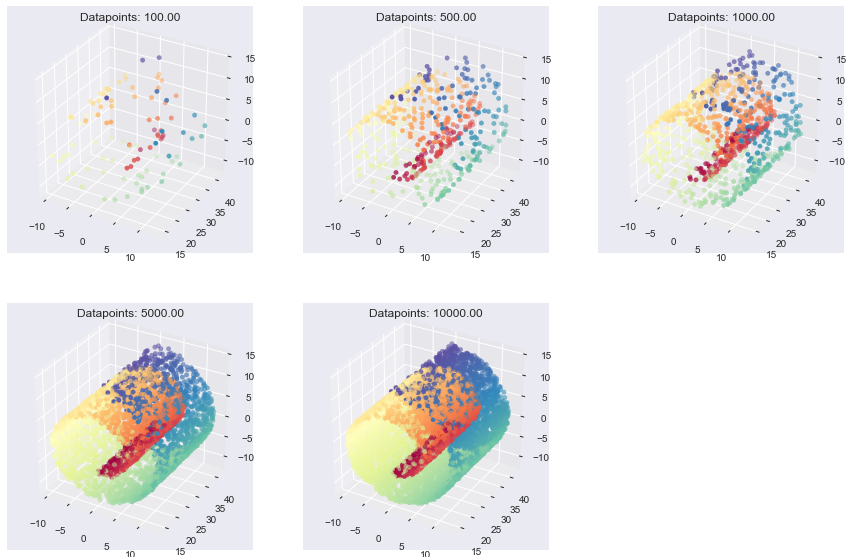

In [20]:
PL.plot_augmented_swissrolls(Xs, colors, datapoint, 'Datapoints')


# For each dataset, we want to get the LLE transformation with varying regularisation term

In [21]:
r_Ys,reg,r_times,r_reconstruction_errors,r_difference=PK.lle_different_data('r',folder, modification,N=5,create=False,Xs=Xs, X_2ds=X_2ds)

In [22]:
interactive(PL.plot_inter_grid, Z=fixed(r_Ys), colors=fixed(colors),var1=fixed(datapoint),var2=fixed(reg),variable=fixed('reg'), 
            transformation=fixed('LLE'),j=widgets.IntSlider(min=0,max=len(r_Ys)-1,step=1, value=0),
            i=widgets.IntSlider(min=0,max=len(reg)-1,step=1, value=0),
           error=fixed(r_reconstruction_errors),
            times=fixed(r_times),difference=fixed(r_difference)
           ,error_type=fixed('reconstruction error'),
           data_augmentation=fixed('datapoints'))

/Users/HeddaVik/anaconda/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


# For each dataset, we want to get the LLE transformation with varying number of neighbours. 

In [8]:
n_Ys,neighbours,n_times,n_reconstruction_errors,n_difference=PK.lle_different_data('n',folder, modification,N=5,create=False,Xs=Xs, X_2ds=X_2ds)

In [9]:
interactive(PL.plot_inter_grid, Z=fixed(n_Ys), colors=fixed(colors),var1=fixed(datapoint),var2=fixed(neighbours),variable=fixed('n_neighbors'), 
            transformation=fixed('LLE'),j=widgets.IntSlider(min=0,max=len(n_Ys)-1,step=1, value=0),
            i=widgets.IntSlider(min=0,max=len(neighbours)-1,step=1, value=0),
           error=fixed(n_reconstruction_errors),
            times=fixed(n_times),difference=fixed(n_difference)
           ,error_type=fixed('reconstruction error'),
           data_augmentation=fixed('datapoints'))

/Users/HeddaVik/anaconda/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


# For each dataset, we want to get the t-SNE transformation with varying perplexity. 

In [10]:
p_Zs,per,p_times,p_kl_divergences,p_difference=PK.t_sne_different_data('p',folder, modification,N=5,create=False,Xs=Xs, X_2ds=X_2ds)

In [11]:
interactive(PL.plot_inter_grid, Z=fixed(p_Zs), colors=fixed(colors),var1=fixed(datapoint),var2=fixed(per),variable=fixed('per'), 
                                                                                transformation=fixed('t-SNE'),
                                                                                j=widgets.IntSlider(min=0,max=len(p_Zs)-1,step=1, value=0),
                                                                                i=widgets.IntSlider(min=0,max=len(per)-1,step=1, value=0),
                                                                                error=fixed(p_kl_divergences),
                                                                                times=fixed(p_times),difference=fixed(p_difference),
                                                                                error_type=fixed('KL-divergence'),
                                                                                data_augmentation=fixed('datapoints'))

/Users/HeddaVik/anaconda/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


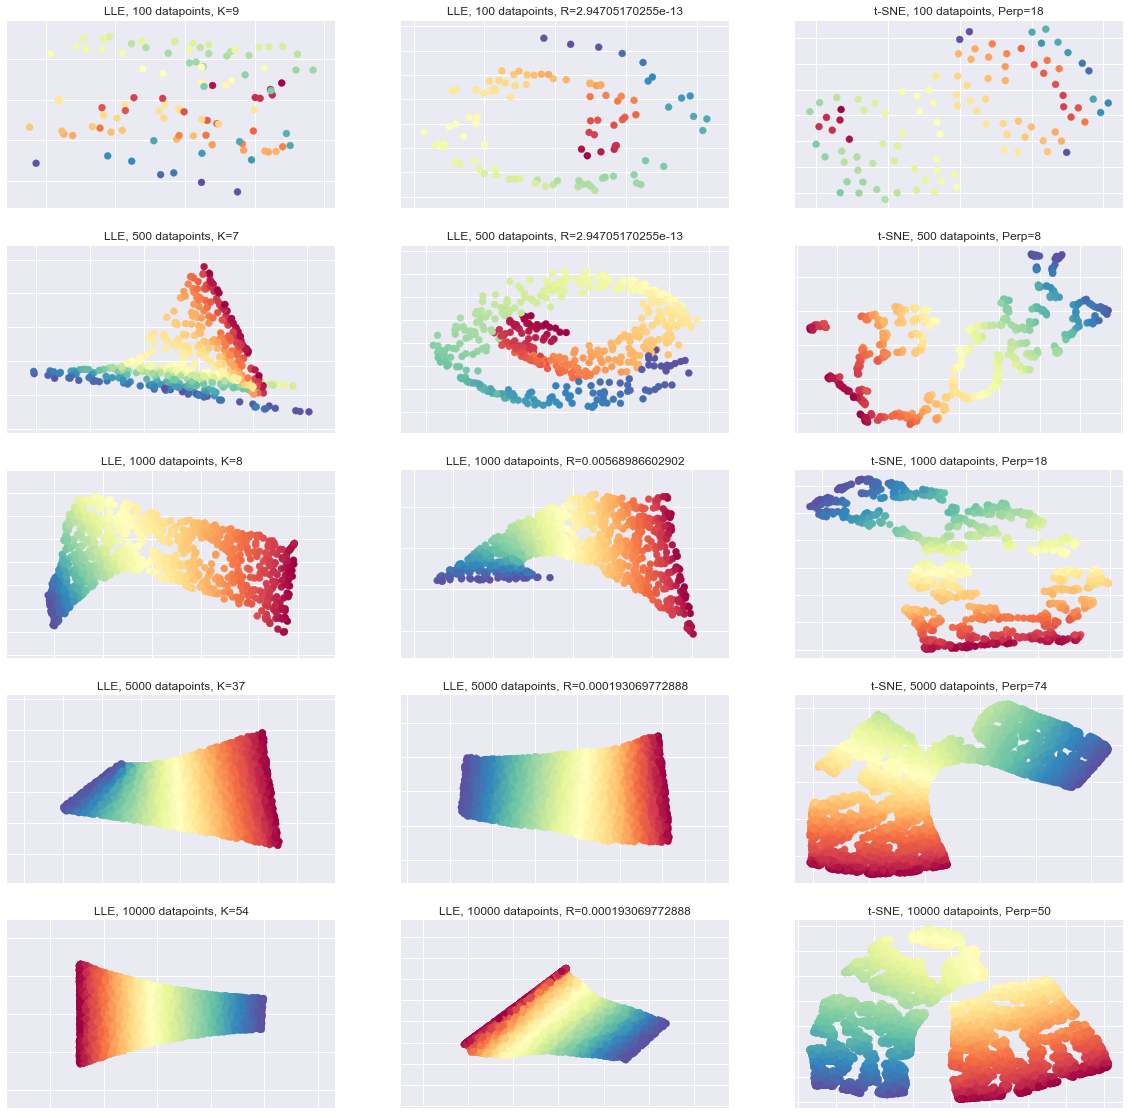

In [12]:
#Plotting a figure to compare the two methods: 

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(531)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, 100 datapoints, K=9')
ax.scatter(n_Ys[0][6][:, 0], n_Ys[0][6][:, 1], c=colors[0], cmap=plt.cm.Spectral)
ax = fig.add_subplot(534)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, 500 datapoints, K=7')
ax.scatter(n_Ys[1][4][:, 0], n_Ys[1][4][:, 1], c=colors[1], cmap=plt.cm.Spectral)
ax = fig.add_subplot(537)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, 1000 datapoints, K=8')
ax.scatter(n_Ys[2][5][:, 0], n_Ys[2][5][:, 1], c=colors[2], cmap=plt.cm.Spectral)
ax = fig.add_subplot(5,3,10)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, 5000 datapoints, K=37')
ax.scatter(n_Ys[3][34][:, 0], n_Ys[3][34][:, 1], c=colors[3], cmap=plt.cm.Spectral)
ax = fig.add_subplot(5,3,13)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, 10000 datapoints, K=54')
ax.scatter(n_Ys[4][51][:, 0], n_Ys[4][51][:, 1], c=colors[4], cmap=plt.cm.Spectral)




ax = fig.add_subplot(532)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, 100 datapoints, R=2.94705170255e-13')
ax.scatter(r_Ys[0][3][:, 0], r_Ys[0][3][:, 1], c=colors[0], cmap=plt.cm.Spectral)
ax = fig.add_subplot(535)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, 500 datapoints, R=2.94705170255e-13')
ax.scatter(r_Ys[1][3][:, 0], r_Ys[1][3][:, 1], c=colors[1], cmap=plt.cm.Spectral)
ax = fig.add_subplot(538)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, 1000 datapoints, R=0.00568986602902')
ax.scatter(r_Ys[2][24][:, 0], r_Ys[2][24][:, 1], c=colors[2], cmap=plt.cm.Spectral)
ax = fig.add_subplot(5,3,11)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, 5000 datapoints, R=0.000193069772888')
ax.scatter(r_Ys[3][21][:, 0], r_Ys[3][21][:, 1], c=colors[3], cmap=plt.cm.Spectral)
ax = fig.add_subplot(5,3,14)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, 10000 datapoints, R=0.000193069772888')
ax.scatter(r_Ys[4][21][:, 0], r_Ys[4][21][:, 1], c=colors[4], cmap=plt.cm.Spectral)



ax = fig.add_subplot(533)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('t-SNE, 100 datapoints, Perp=18')
ax.scatter(p_Zs[0][8][:, 0], p_Zs[0][8][:, 1], c=colors[0], cmap=plt.cm.Spectral)
ax = fig.add_subplot(536)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('t-SNE, 500 datapoints, Perp=8')
ax.scatter(p_Zs[1][3][:, 0], p_Zs[1][3][:, 1], c=colors[1], cmap=plt.cm.Spectral)
ax = fig.add_subplot(539)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('t-SNE, 1000 datapoints, Perp=18')
ax.scatter(p_Zs[2][8][:, 0], p_Zs[2][8][:, 1], c=colors[2], cmap=plt.cm.Spectral)
ax = fig.add_subplot(5,3,12)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('t-SNE, 5000 datapoints, Perp=74')
ax.scatter(p_Zs[3][36][:, 0], p_Zs[3][36][:, 1], c=colors[3], cmap=plt.cm.Spectral)
ax = fig.add_subplot(5,3,15)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('t-SNE, 10000 datapoints, Perp=50')
ax.scatter(p_Zs[4][24][:, 0], p_Zs[4][24][:, 1], c=colors[4], cmap=plt.cm.Spectral)

plt.show()

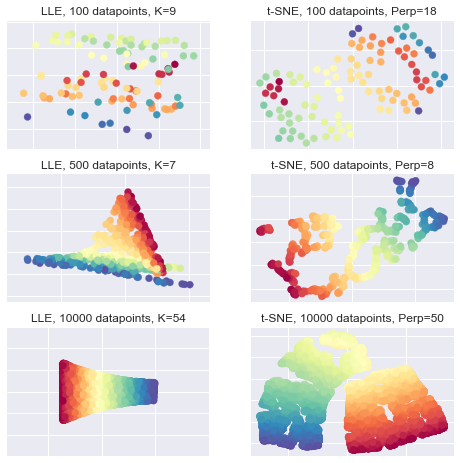

In [15]:
# Plotting a smaller figure that can be included in the report: 
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(321)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, 100 datapoints, K=9')
ax.scatter(n_Ys[0][6][:, 0], n_Ys[0][6][:, 1], c=colors[0], cmap=plt.cm.Spectral)
ax = fig.add_subplot(322)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('t-SNE, 100 datapoints, Perp=18')
ax.scatter(p_Zs[0][8][:, 0], p_Zs[0][8][:, 1], c=colors[0], cmap=plt.cm.Spectral)

ax = fig.add_subplot(323)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, 500 datapoints, K=7')
ax.scatter(n_Ys[1][4][:, 0], n_Ys[1][4][:, 1], c=colors[1], cmap=plt.cm.Spectral)
ax = fig.add_subplot(324)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('t-SNE, 500 datapoints, Perp=8')
ax.scatter(p_Zs[1][3][:, 0], p_Zs[1][3][:, 1], c=colors[1], cmap=plt.cm.Spectral)
ax = fig.add_subplot(325)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, 10000 datapoints, K=54')
ax.scatter(n_Ys[4][51][:, 0], n_Ys[4][51][:, 1], c=colors[4], cmap=plt.cm.Spectral)
ax = fig.add_subplot(326)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('t-SNE, 10000 datapoints, Perp=50')
ax.scatter(p_Zs[4][24][:, 0], p_Zs[4][24][:, 1], c=colors[4], cmap=plt.cm.Spectral)
plt.savefig('N_comparison.pdf')